# Problem Statement

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Importing Libraries

In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 1000
No of Columns: 40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Check for Duplicate entries

In [6]:
df.duplicated('policy_number').sum() # This will check if any duplicate entry or duplicate row with same policy_number

0

 No duplicate entries found

# Let's check for Null Values

In [7]:
df.isin([' ','NA','-']).sum().any()

False

# Let's check for '-', ' ', 'NA', 'N/A', '?', ','

In [9]:
df.isin(['?']).sum().any()

True

dataset contains some '?' values which we will replace by NaN

In [8]:
df=df.replace('?',np.NaN)

In [9]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
authorities_contacted                     0             0.0
total_claim_amount                        0             0.0
injury_claim                            

# Missing Values Imputation

In [10]:
# Since all the columns with miossing values are of object data type so we will impute the null values of these columns by their respective mode values
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

# Droping unnecessary columns

In [11]:
# Since _c39 feature has 100% missing values we will drop thei feature
# Also incident_location, insured_zip and policy_number are irrelevent for prediction so we will drop these features as well
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

We can see that the column 'policy_csl' has numerical values seperated by '/'. Hence data type of this column showing object datatype.
Also we can not treat this type of data so we will split this column into 2 seperate columns.


In [12]:
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [13]:
# now drop the original feature
df.drop("policy_csl",axis=1,inplace=True)

Also dataset has 2 columns in datetime format. So we have to split them into date, month & year.

In [14]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [15]:
#Extract Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [16]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [17]:
df.drop(['incident_year'],axis=1,inplace=True)

We have a feature 'auto_year' which gives us the year from which the vehicle is on road.
We can find age age of vehicle from this feature.

In [18]:
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

# Seperate Categorical & Numerical features

In [19]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [20]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

# Descriptive Statistics

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


In [23]:
df[Category].describe().T

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


# Visualization

# 1. fraud_reported

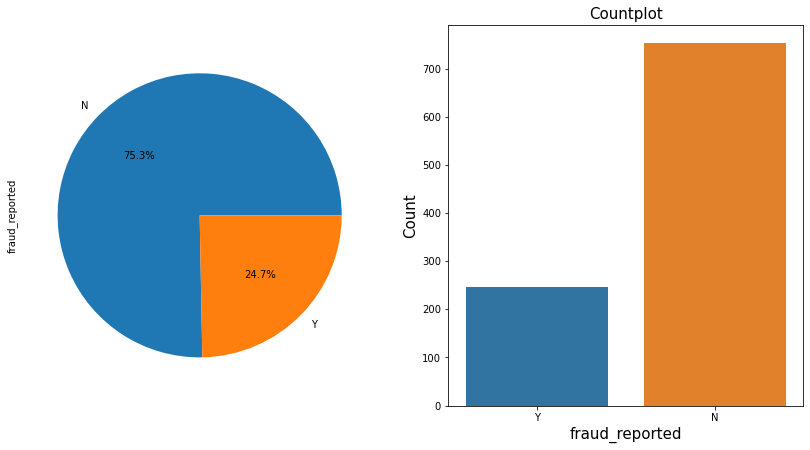

N    753
Y    247
Name: fraud_reported, dtype: int64

In [25]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['fraud_reported'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# fraud_reported Countplot
sns.countplot('fraud_reported',data = df,ax=ax[1])
plt.xlabel('fraud_reported', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['fraud_reported'].value_counts()

# Observations

1. 247 i.e 24.7% cases are reported as fraud.
2. 753 i.e 75.3% cases are reported as not fraud.
3. fraud_reported is our target variable & from the above countplot we can see that it is imbalanced. So we need to balance it before model building

# 2. insured_sex

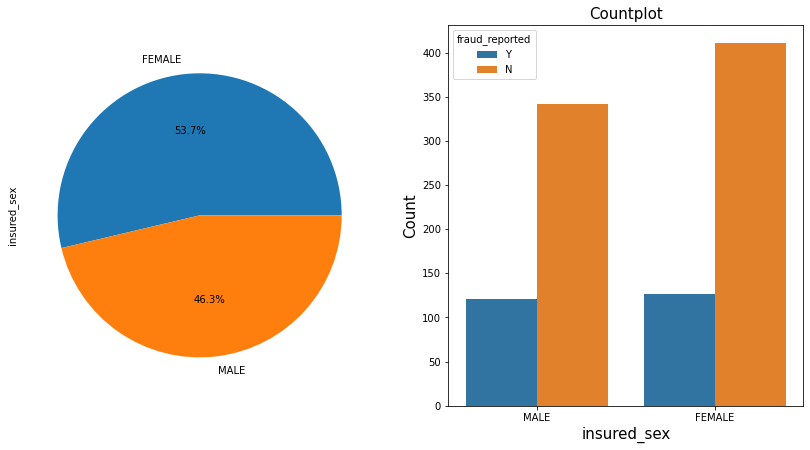

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [26]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['insured_sex'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('insured_sex',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('insured_sex', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['insured_sex'].value_counts()

# Observations

1. 53.7% claims are comin from Females and 46.3% are from males.
2. The number of claims reported fraud by males & females are nearly equal.

# 3. insured_education_level

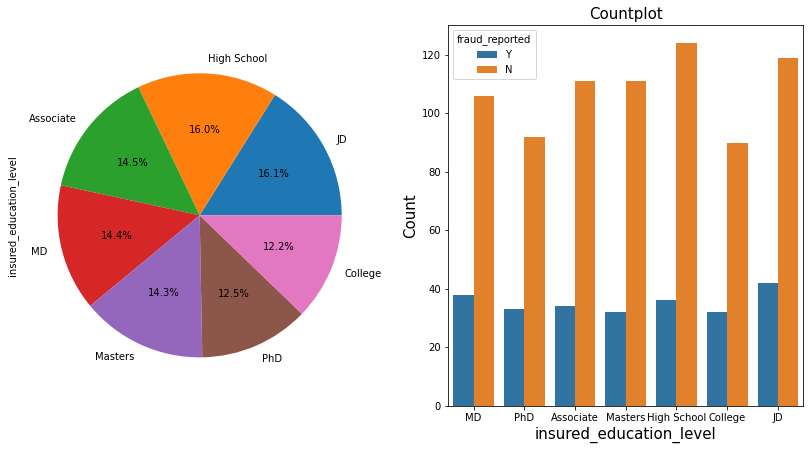

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [27]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['insured_education_level'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('insured_education_level',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('insured_education_level', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['insured_education_level'].value_counts()

# Observations

1. 16% insured_education_level is High School 
2. 14.5% insured_education_level is Associate
3. 14.4% insured_education_level is MD
4. 14.3% insured_education_level is Masters        
5. 12.5% insured_education_level is PhD
6. 12.2% insured_education_level is College
7. 16.1% insured_education_level is JD
8. Highest number of fraud cases are reported for education level JD
9. Less number of fraud cases are reported for education level Masters & College.

# 4. insured_occupation

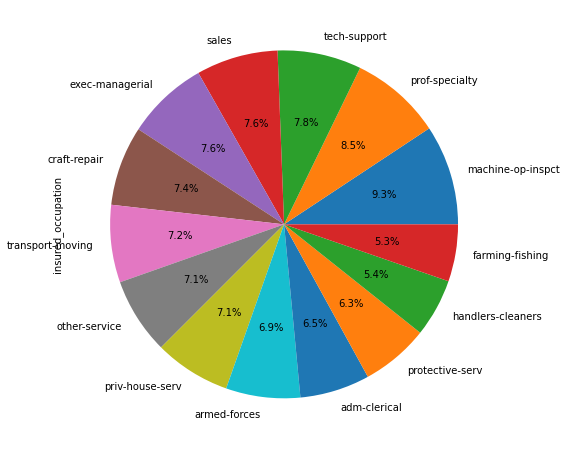

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [28]:
plt.figure(figsize=(15,8))

df['insured_occupation'].value_counts().plot(kind="pie",autopct='%3.1f%%')
plt.show()
df['insured_occupation'].value_counts()

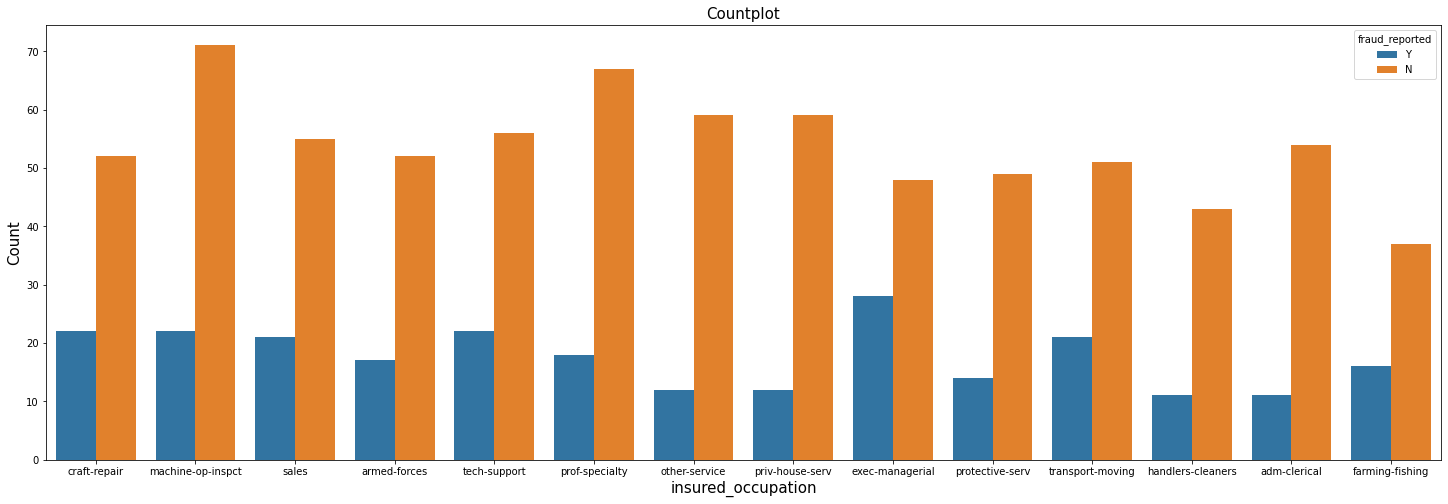

In [29]:
plt.figure(figsize=(25,8))


sns.countplot('insured_occupation',hue = df['fraud_reported'],data = df)
plt.xlabel('insured_occupation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()


# Observations

1. Less number of fraud cases are reported for occupation handlers-cleaners.
2. Highest number of fraud cases are reported for occupation exec-managerial.

# 5. insured_hobbies

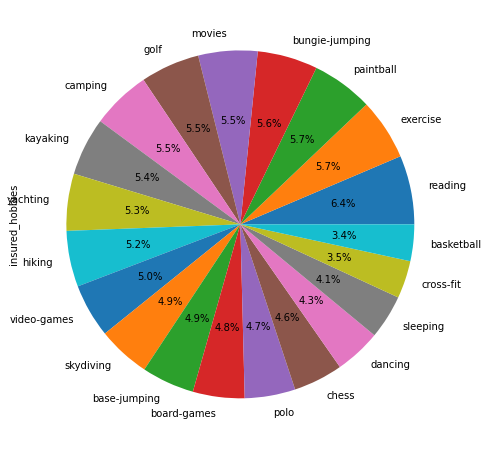

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [30]:
plt.figure(figsize=(15,8))

df['insured_hobbies'].value_counts().plot(kind="pie",autopct='%3.1f%%')
plt.show()
df['insured_hobbies'].value_counts()

# Observations

1. The highest percentage of Online shopping is from city "Delhi".
2. The lowest percentage of Online shopping are from cities "Bulandshahr" and "Moradabad".

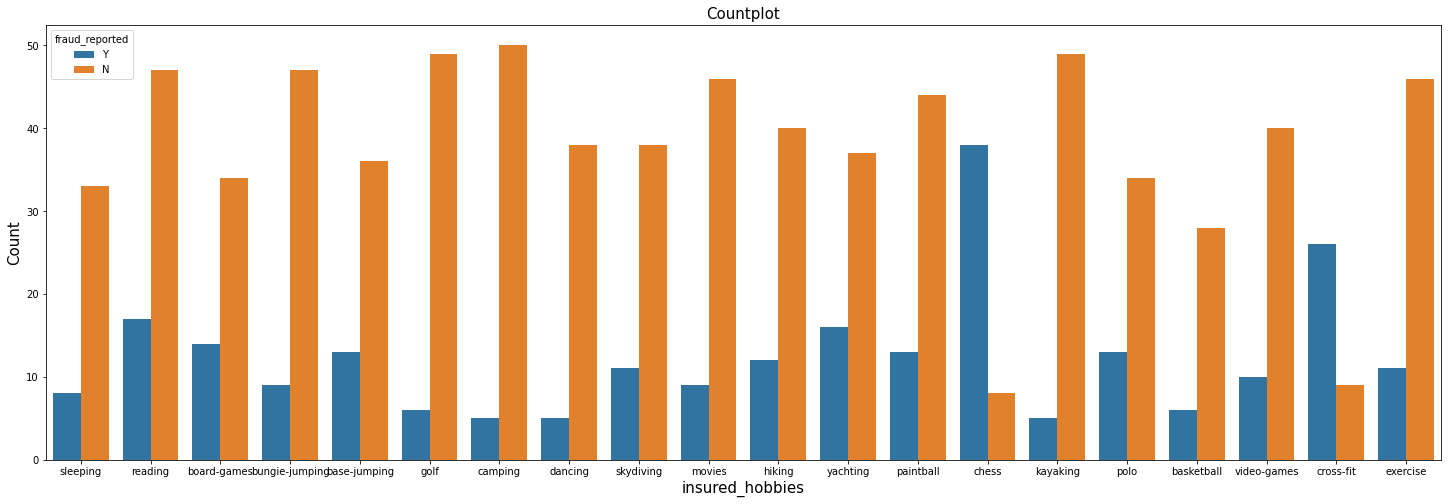

In [31]:
plt.figure(figsize=(25,8))


sns.countplot('insured_hobbies',hue = df['fraud_reported'],data = df)
plt.xlabel('insured_hobbies', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()


# Observations

1. Highest number of fraud cases are reported for Chess
2. The less number of fraud cases are reported for Camping

# 6. insured_relationship

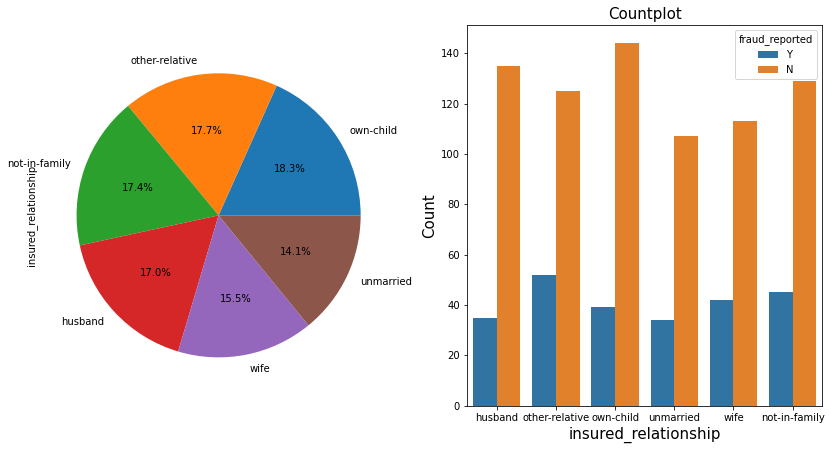

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [32]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['insured_relationship'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('insured_relationship',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('insured_relationship', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['insured_relationship'].value_counts()

# Observations

1. most of the fraud cases are reported for other-relative 
2. less number of the fraud cases are reported for unmarried insured.


# 7. incident_type

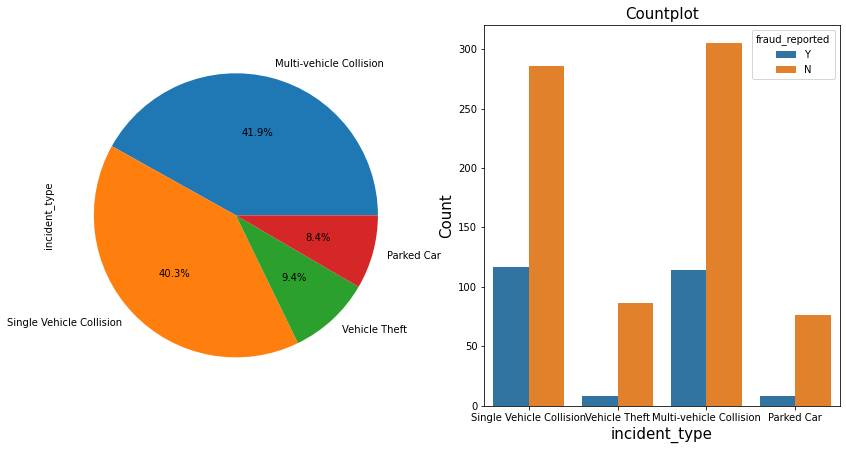

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [33]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['incident_type'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('incident_type',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('incident_type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['incident_type'].value_counts()

# Observations

1. 41.9% claims are for Multi-vehicle Collision incident type
2. 40.3% claims are for Single Vehicle Collision incident type
3. 9.4% claims are for Vehicle Theft incident type
4. 8.4% claims are for Parked Car incident type
5. most of the fraud cases are reported for Single Vehicle Collision & Multi-vehicle Collision
6. less fraud cases are reported for parked car & Vehicle theft

# 8. collision_type

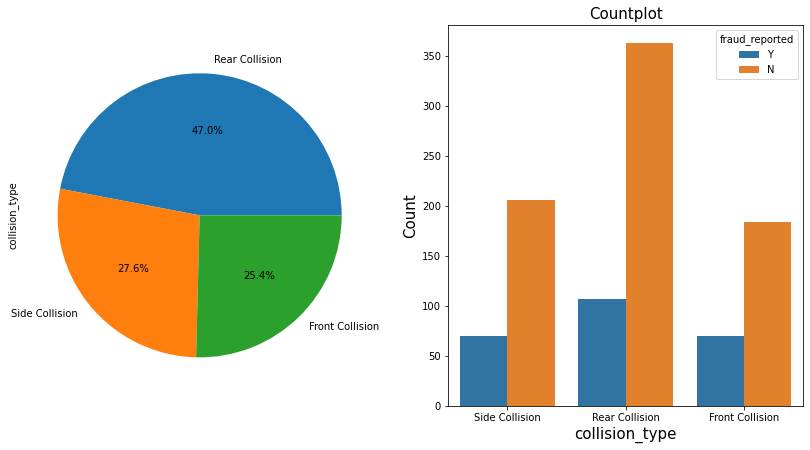

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [34]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['collision_type'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('collision_type',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('collision_type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['collision_type'].value_counts()

# Observations

1. 47% claims are for Rear Collision .
2. 27.6% claims are for Side Collision.
3. 25.4% claims are for Front  Collision.
4. most of the fraud cases are reported for Side Collision
5. less fraud cases are reported for Rear Collision

# 9. incident_severity

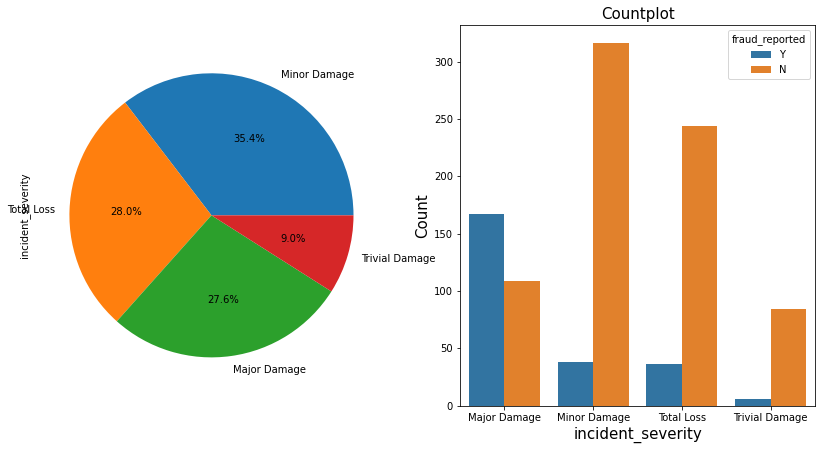

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [35]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['incident_severity'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('incident_severity',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('incident_severity', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['incident_severity'].value_counts()

# Observations

1. 35.4% claims are for Minor Damage.
2. 28% claims are for Total Loss.
3. 27.6% claims are for Major Damage.
4. 9% claims are for Trivial Damage.
5. less of the fraud cases are reported for Trivial Damage.
6. most of the fraud cases are reported for Major Damage.

# 10. authorities_contacted

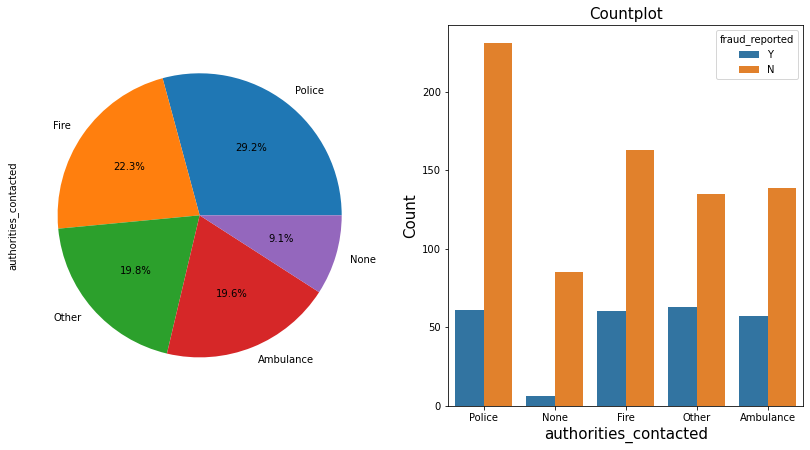

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [36]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['authorities_contacted'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('authorities_contacted',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('authorities_contacted', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['authorities_contacted'].value_counts()

# Observations

1. in 29.2% cases contacted authority is Police.
2. in 22.3% cases contacted authority is Fire.
3. in 19.8% cases contacted authority is Other.
4. in 19.6% cases contacted authority is Ambulance.
5. in 9.1% cases contacted authority is None.
6. There are very less fraud cases reported for None authorities_contacted.
7. Most of the fraud cases are reported for Other authorities_contacted.

# 11. incident_state

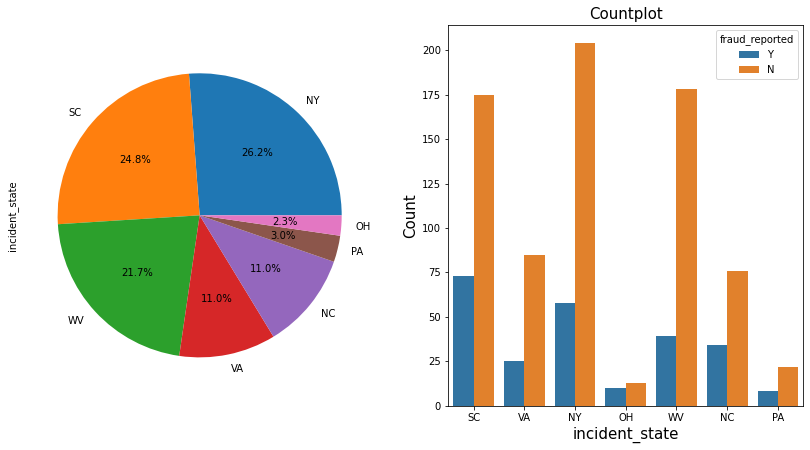

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [37]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['incident_state'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('incident_state',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('incident_state', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['incident_state'].value_counts()

# Observations

1. 26.2% incidents are happened in NY
2. 24.8% incidents are happened in SC.
3. 21.7% incidents are happened in WV.
4. 11% incidents are happened in VA.
5. 11% incidents are happened in NC.
6. 3% incidents are happened in PA.
7. 2.3% incidents are happened in oH.
8. less number of fraud cases are reported in PA City
9. most of the fraud cases are reported in SC city.

# 12. property_damage

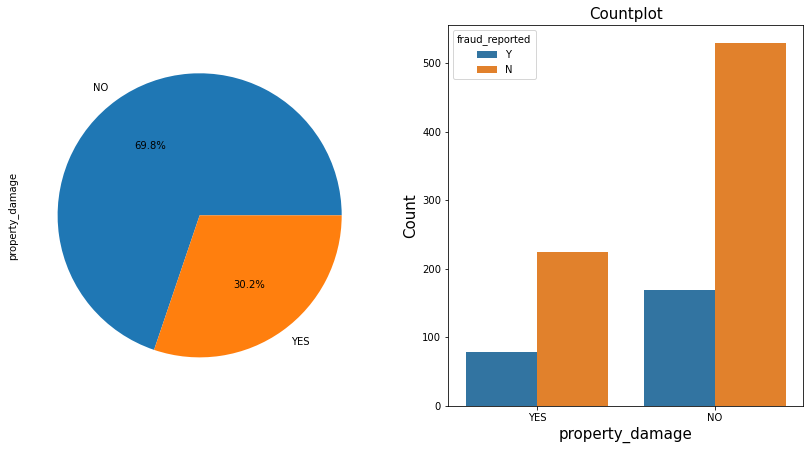

NO     698
YES    302
Name: property_damage, dtype: int64

In [38]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['property_damage'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('property_damage',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('property_damage', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['property_damage'].value_counts()

# Observations

1. There is no property damage in near about 70% claims
2. Property damage is in only 30% claims
3. less number of fraud cases are reported in case of property damage
4. most of the fraud cases are reported in case of No property damage

# 13. police_report_available

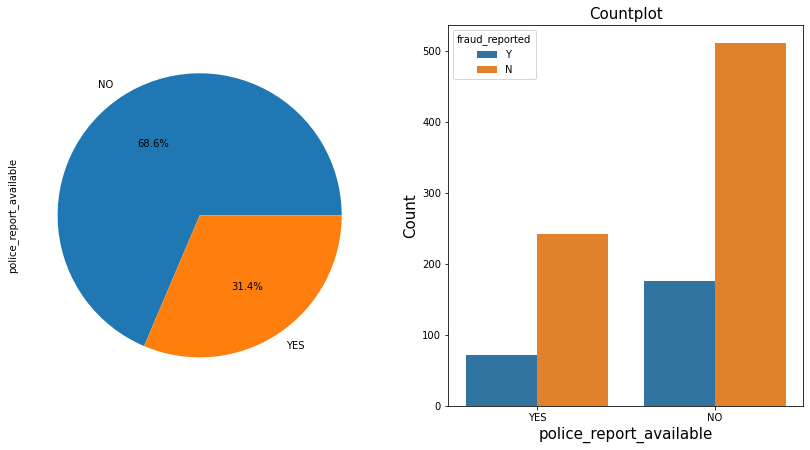

NO     686
YES    314
Name: police_report_available, dtype: int64

In [40]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['police_report_available'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('police_report_available',hue = df['fraud_reported'],data = df,ax=ax[1])
plt.xlabel('police_report_available', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['police_report_available'].value_counts()

# Observations

1. In 68.6% cases police report is not available.
2. 31.4% cases police report is available.
3. most of the fraud cases are reported where police report is not available
4. less of the fraud cases are reported where police report is available

# 14. auto_make

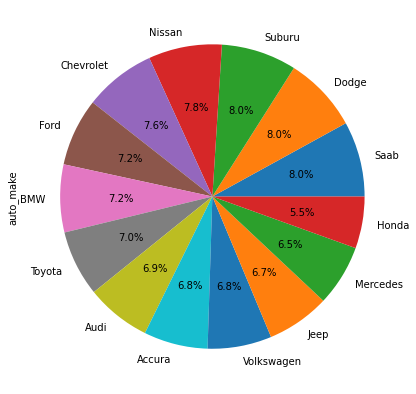

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [41]:
plt.figure(figsize=(20,7))

df['auto_make'].value_counts().plot(kind="pie",autopct='%3.1f%%')


plt.show()
df['auto_make'].value_counts()

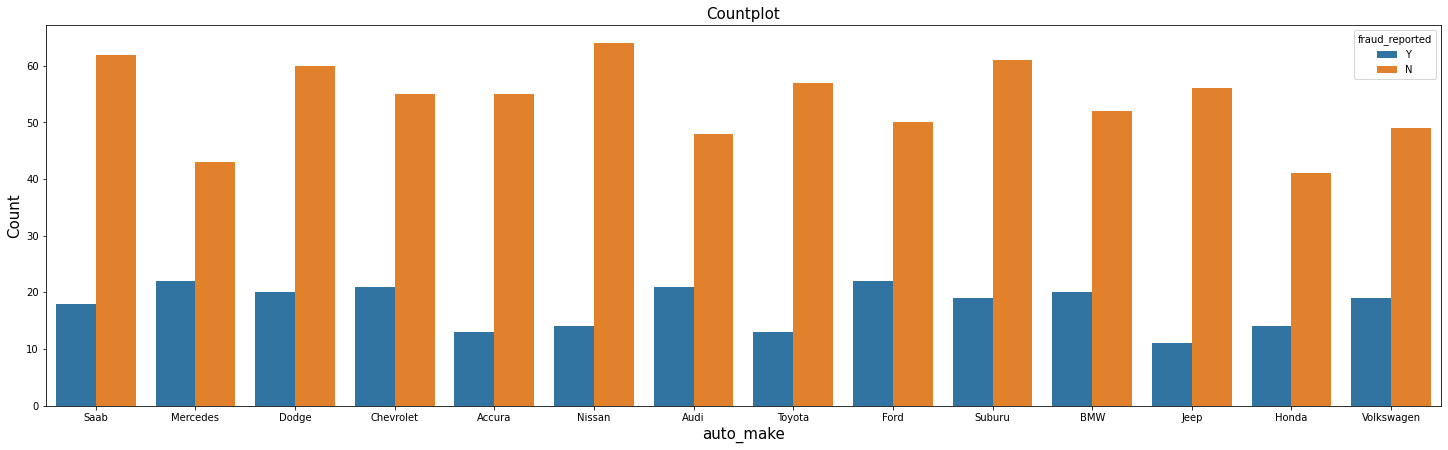

In [42]:
plt.figure(figsize=(25,7))
sns.countplot('auto_make',hue = df['fraud_reported'],data = df)
plt.xlabel('auto_make', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()


# Observations

1. most of the fraud cases are reported for Ford
2. less of the fraud cases are reported for Jeep

# 15. auto_model

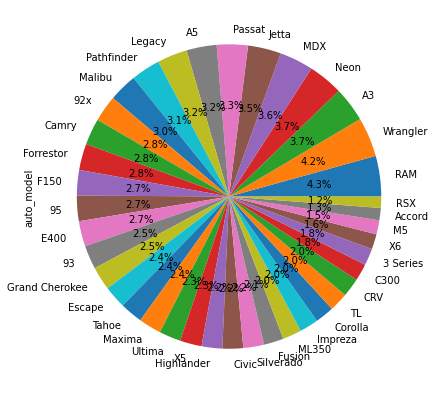

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [43]:
plt.figure(figsize=(20,7))

df['auto_model'].value_counts().plot(kind="pie",autopct='%3.1f%%')


plt.show()
df['auto_model'].value_counts()

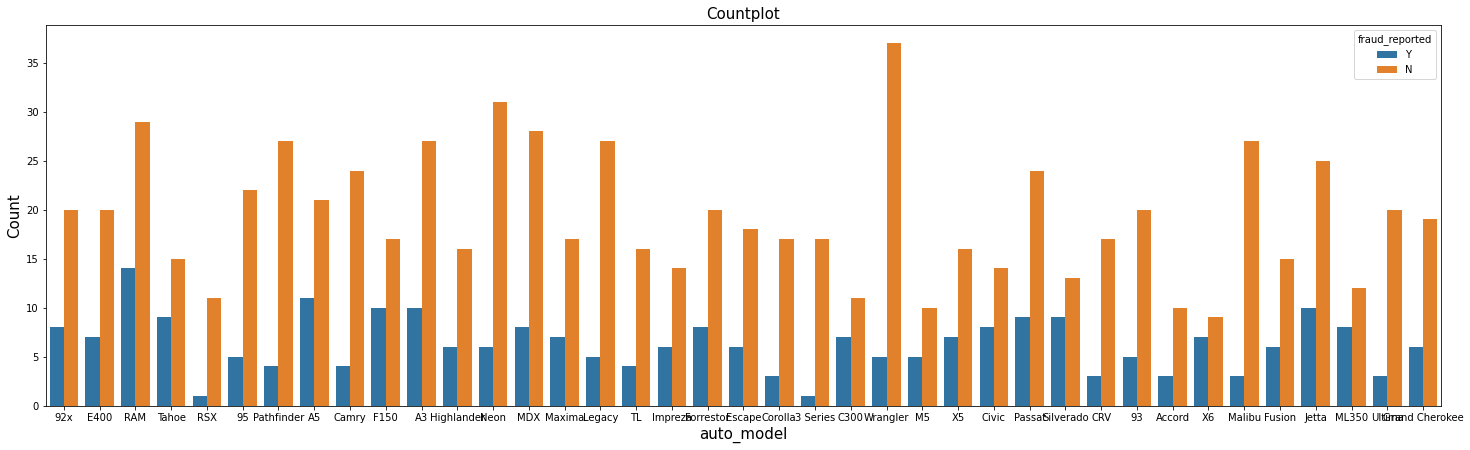

In [44]:
plt.figure(figsize=(25,7))
sns.countplot('auto_model',hue = df['fraud_reported'],data = df)
plt.xlabel('auto_model', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()


# Observations

1. most of the fraud cases are reported for auto_model RAM
2. less of the fraud cases are reported for auto_model RSX & 3 Series.

# Visualization of Numerical Features

# 1. age

<AxesSubplot:xlabel='age', ylabel='fraud_reported'>

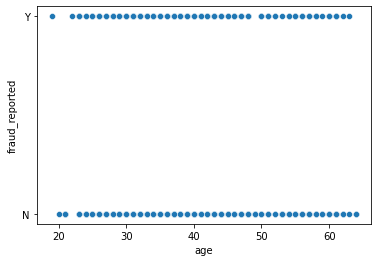

In [45]:
sns.scatterplot(x=df['age'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='fraud_reported'>

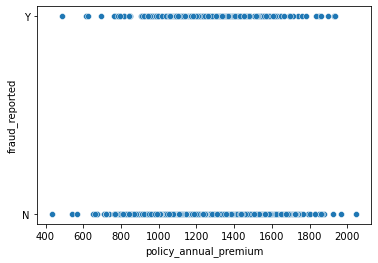

In [46]:
sns.scatterplot(x=df['policy_annual_premium'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='umbrella_limit', ylabel='fraud_reported'>

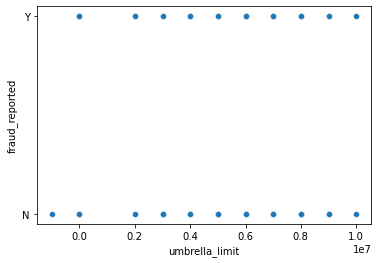

In [47]:
sns.scatterplot(x=df['umbrella_limit'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='capital-gains', ylabel='fraud_reported'>

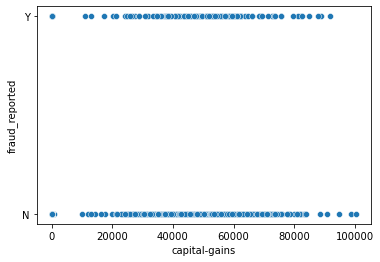

In [48]:
sns.scatterplot(x=df['capital-gains'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='capital-loss', ylabel='fraud_reported'>

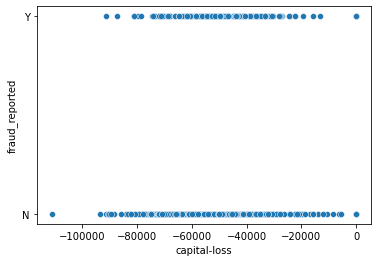

In [49]:
sns.scatterplot(x=df['capital-loss'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='total_claim_amount', ylabel='fraud_reported'>

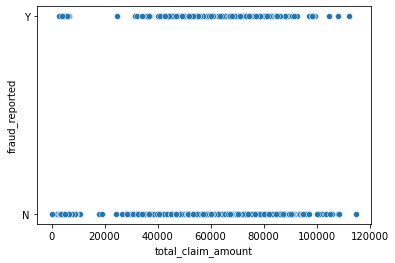

In [50]:
sns.scatterplot(x=df['total_claim_amount'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='witnesses', ylabel='fraud_reported'>

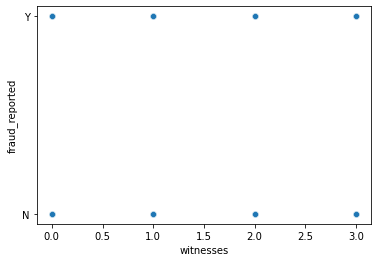

In [51]:
sns.scatterplot(x=df['witnesses'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='total_claim_amount', ylabel='fraud_reported'>

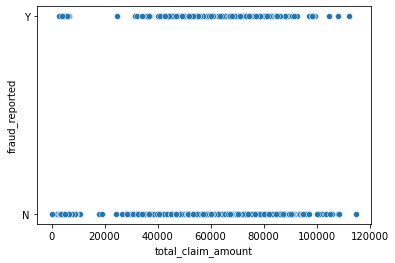

In [52]:
sns.scatterplot(x=df['total_claim_amount'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='injury_claim', ylabel='fraud_reported'>

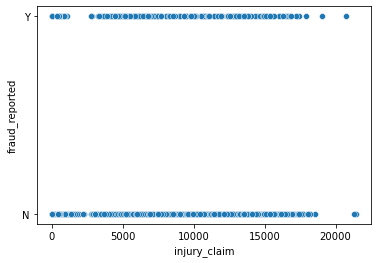

In [53]:
sns.scatterplot(x=df['injury_claim'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='property_claim', ylabel='fraud_reported'>

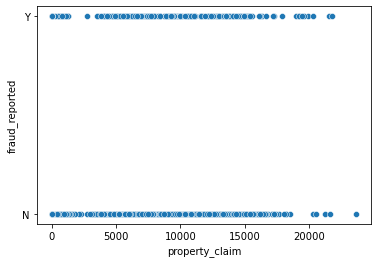

In [54]:
sns.scatterplot(x=df['property_claim'], y = df['fraud_reported'],data = df)

<AxesSubplot:xlabel='vehicle_claim', ylabel='fraud_reported'>

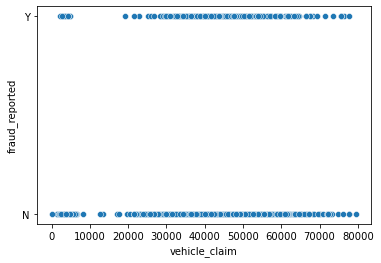

In [55]:
sns.scatterplot(x=df['vehicle_claim'], y = df['fraud_reported'],data = df)

In [58]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

# Label Encoding

In [59]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,1,2,17,10,2014,25,1,11
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,1,2,27,6,2006,21,1,8
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,0,1,9,6,2000,22,2,8
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,1,2,25,5,1990,1,10,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,2,0,6,6,2014,17,2,6


In [60]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium']}

# Check for Outliers

In [61]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

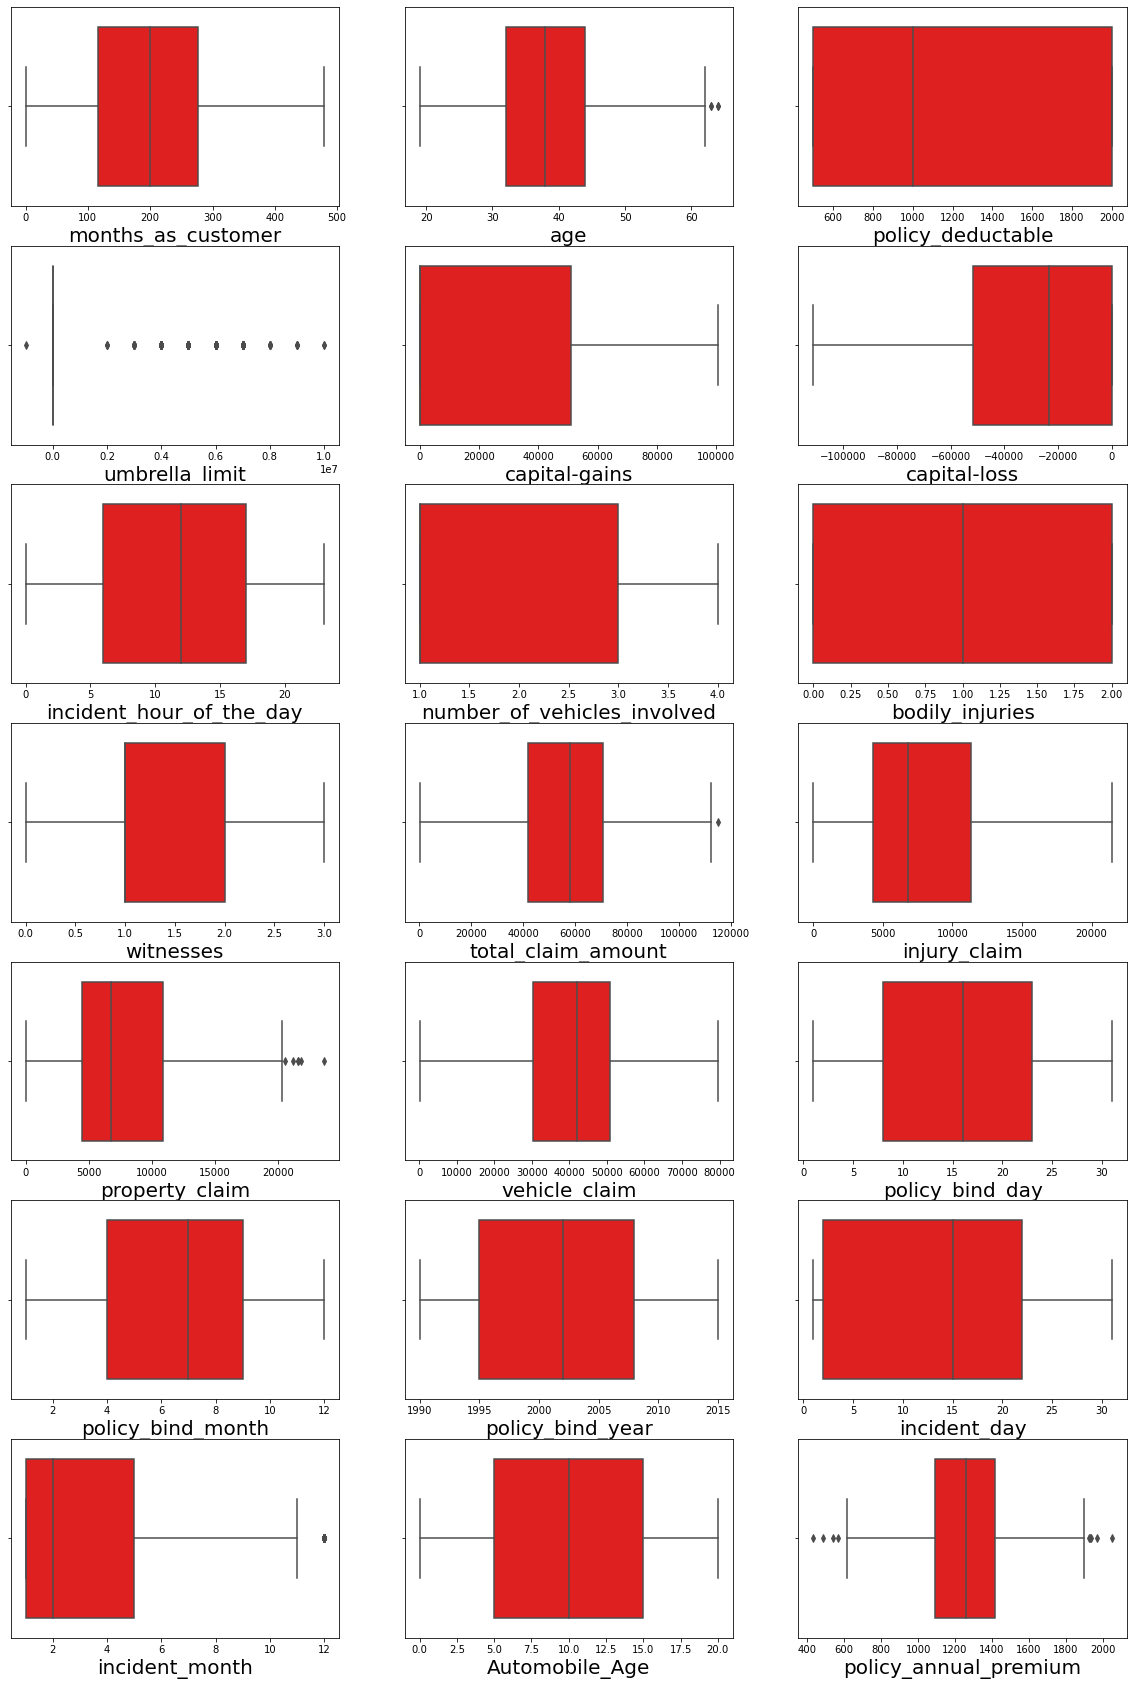

In [62]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Let's remove Outliers

In [63]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


# Let's check for distribution of numerical features

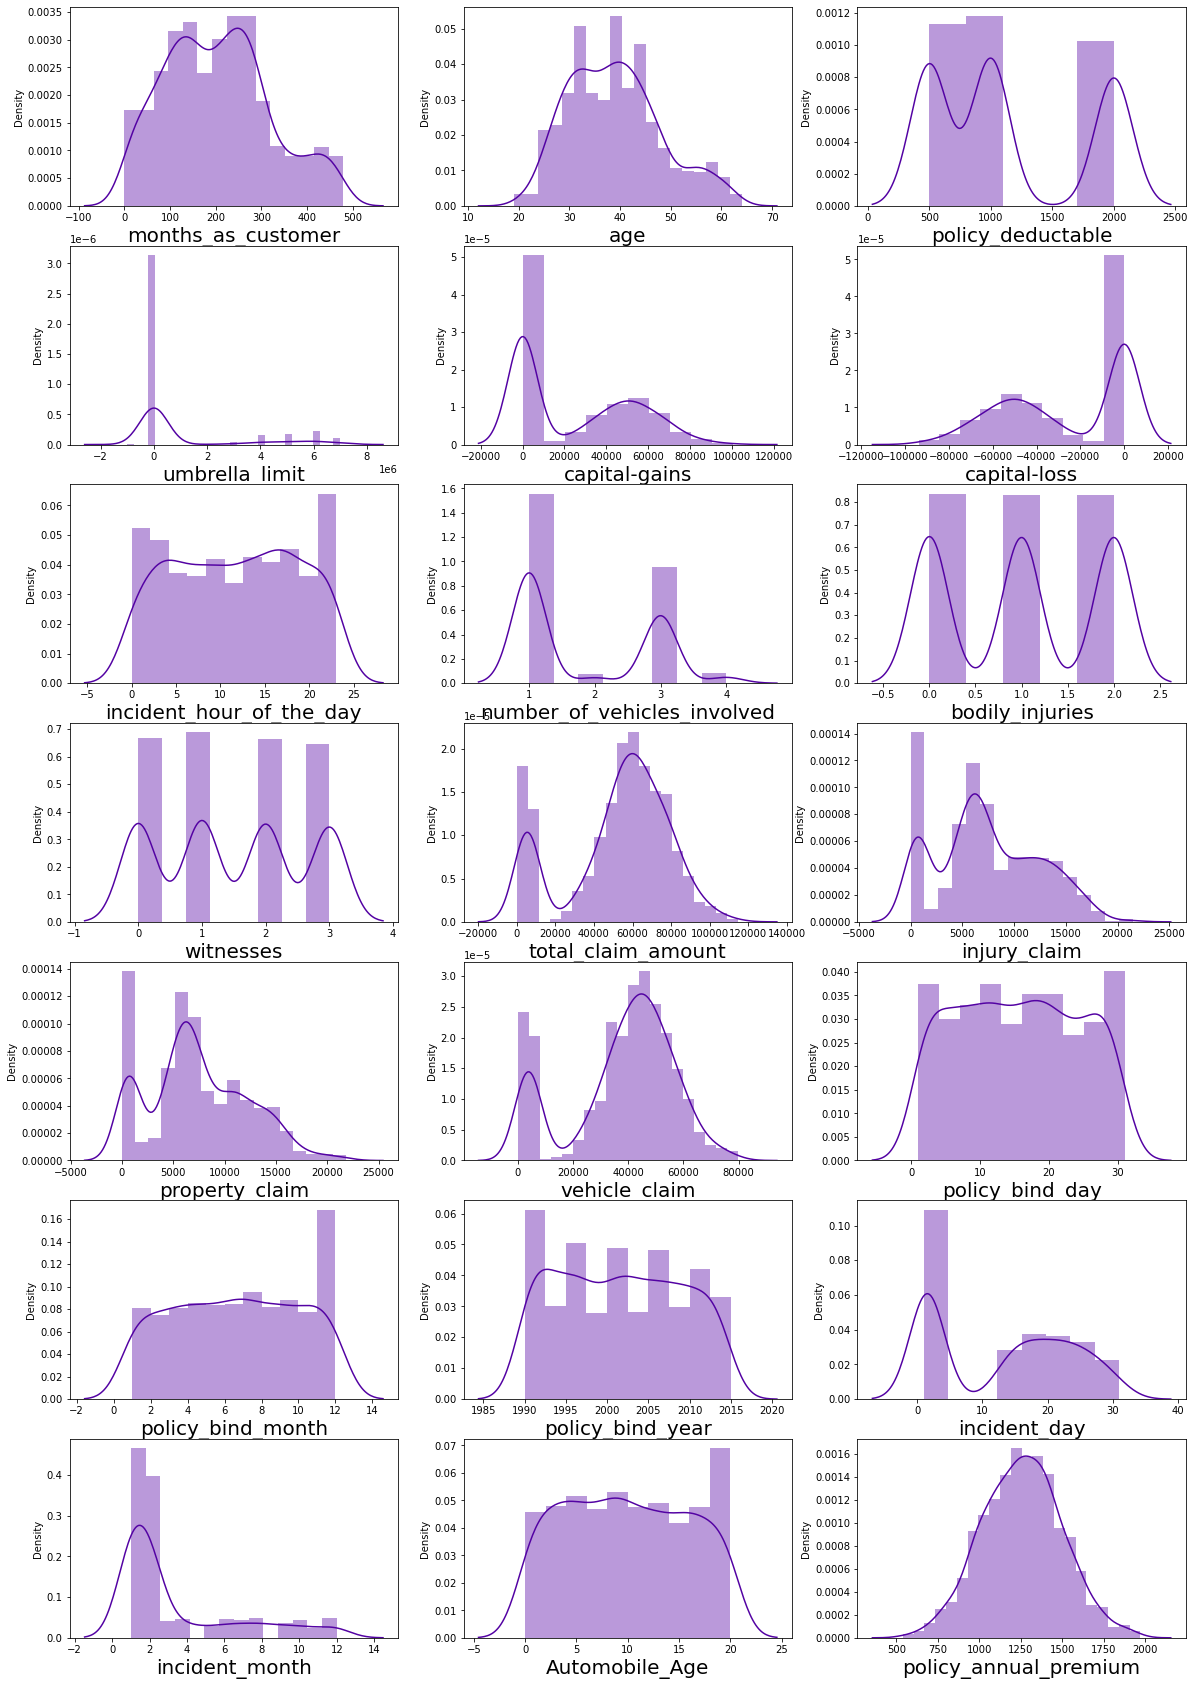

In [64]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Skewness

In [65]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

In [66]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [67]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

# Correlation

In [68]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
months_as_customer,1.000000,0.922960,-0.007183,0.031041,-0.003814,0.018213,0.059644,-0.000731,0.006925,-0.089358,0.071492,0.007468,0.023041,-0.016746,-0.073031,-0.064094,0.013782,0.015811,-0.006601,0.066198,0.011831,-0.000630,-0.007674,0.063574,-0.017200,0.059338,0.065062,0.036660,0.056360,0.049734,0.005130,0.021285,-0.021855,0.007121,0.050824,0.004207,-0.041914,-0.010538,0.019242,-0.000869
age,0.922960,1.000000,-0.020012,0.032036,0.005330,0.013256,0.073790,0.001647,0.014798,-0.079099,0.076129,-0.004529,0.012860,-0.026286,-0.076325,-0.064396,0.018441,0.012644,-0.006685,0.083720,0.020391,-0.008239,-0.012254,0.056360,-0.018135,0.068448,0.077149,0.062375,0.059129,0.033757,0.015322,0.013279,-0.013323,0.011258,0.053147,0.014492,-0.031709,-0.005843,0.018221,-0.005594
policy_state,-0.007183,-0.020012,1.000000,0.017612,0.015089,-0.010921,-0.018002,-0.027173,-0.025357,-0.039501,-0.017060,0.068619,-0.031926,0.032373,0.049961,-0.028353,-0.014647,0.019456,-0.002809,0.021926,-0.045514,-0.013576,0.012097,0.025838,0.065316,-0.015056,-0.048188,-0.006420,-0.006411,0.010259,-0.018008,0.034587,0.001653,0.029007,-0.000583,0.073692,-0.003045,0.016049,0.027889,0.001160
policy_deductable,0.031041,0.032036,0.017612,1.000000,-0.008300,0.013471,-0.006977,0.014101,-0.053888,-0.001923,-0.019000,0.031673,-0.019601,-0.032291,-0.055984,-0.016363,0.002769,0.000647,-0.047304,0.064732,0.046331,0.013074,-0.037263,0.071709,0.036275,0.024385,0.038459,0.071031,0.004874,-0.028032,-0.002591,0.015774,0.009912,-0.014554,0.013395,-0.054208,-0.054041,-0.018115,-0.010288,-0.030569
policy_annual_premium,-0.003814,0.005330,0.015089,-0.008300,1.000000,-0.014107,0.041312,-0.021400,0.027827,-0.014226,0.004417,-0.006807,0.033133,0.051606,0.032604,-0.013911,-0.054425,0.048647,0.047771,-0.006448,-0.044544,0.076447,0.027837,0.003433,0.032413,-0.000944,-0.024119,-0.014073,0.009194,0.009311,-0.038226,-0.012686,0.032654,-0.001868,-0.032681,-0.031608,0.002433,0.018671,0.009544,0.042446
umbrella_limit,0.018213,0.013256,-0.010921,0.013471,-0.014107,1.000000,0.018068,-0.030887,0.003973,-0.034098,0.095972,-0.022753,-0.025844,0.034951,0.008716,-0.001297,0.022396,-0.081479,0.039685,-0.022571,-0.041298,-0.083258,0.047719,-0.001363,-0.036754,-0.047400,-0.046298,-0.021380,-0.048842,0.012857,0.015360,0.044729,0.013504,0.025418,-0.030416,-0.001072,0.049032,-0.031948,0.029210,-0.027952
insured_sex,0.059644,0.073790,-0.018002,-0.006977,0.041312,0.018068,1.000000,0.010068,-0.007440,-0.020928,0.004488,-0.019824,-0.030319,0.009540,-0.019044,-0.021242,0.019423,-0.022522,0.009957,0.012904,0.018852,0.032636,-0.015199,0.039343,0.014179,-0.016933,0.008472,-0.008744,-0.023597,0.019996,-0.018657,0.020582,-0.003405,0.071995,0.047690,-0.003125,-0.031230,-0.017208,0.036916,0.033336
insured_education_level,-0.000731,0.001647,-0.027173,0.014101,-0.021400,-0.030887,0.010068,1.000000,-0.025394,0.025229,-0.028673,0.044276,0.037070,0.005854,-0.022368,-0.010929,-0.015500,-0.007821,-0.022502,-0.053983,0.003279,-0.050922,-0.017959,0.021747,0.055785,0.079642,0.086600,0.062230,0.072650,0.060043,0.042735,0.013116,0.008337,-0.005150,0.018977,-0.011963,0.016874,-0.051772,0.069564,-0.054438
insured_occupation,0.006925,0.014798,-0.025357,-0.053888,0.027827,0.003973,-0.007440,-0.025394,1.000000,-0.010375,-0.012135,0.000409,-0.016182,0.003755,0.012390,-0.000513,-0.000998,-0.020759,0.003112,-0

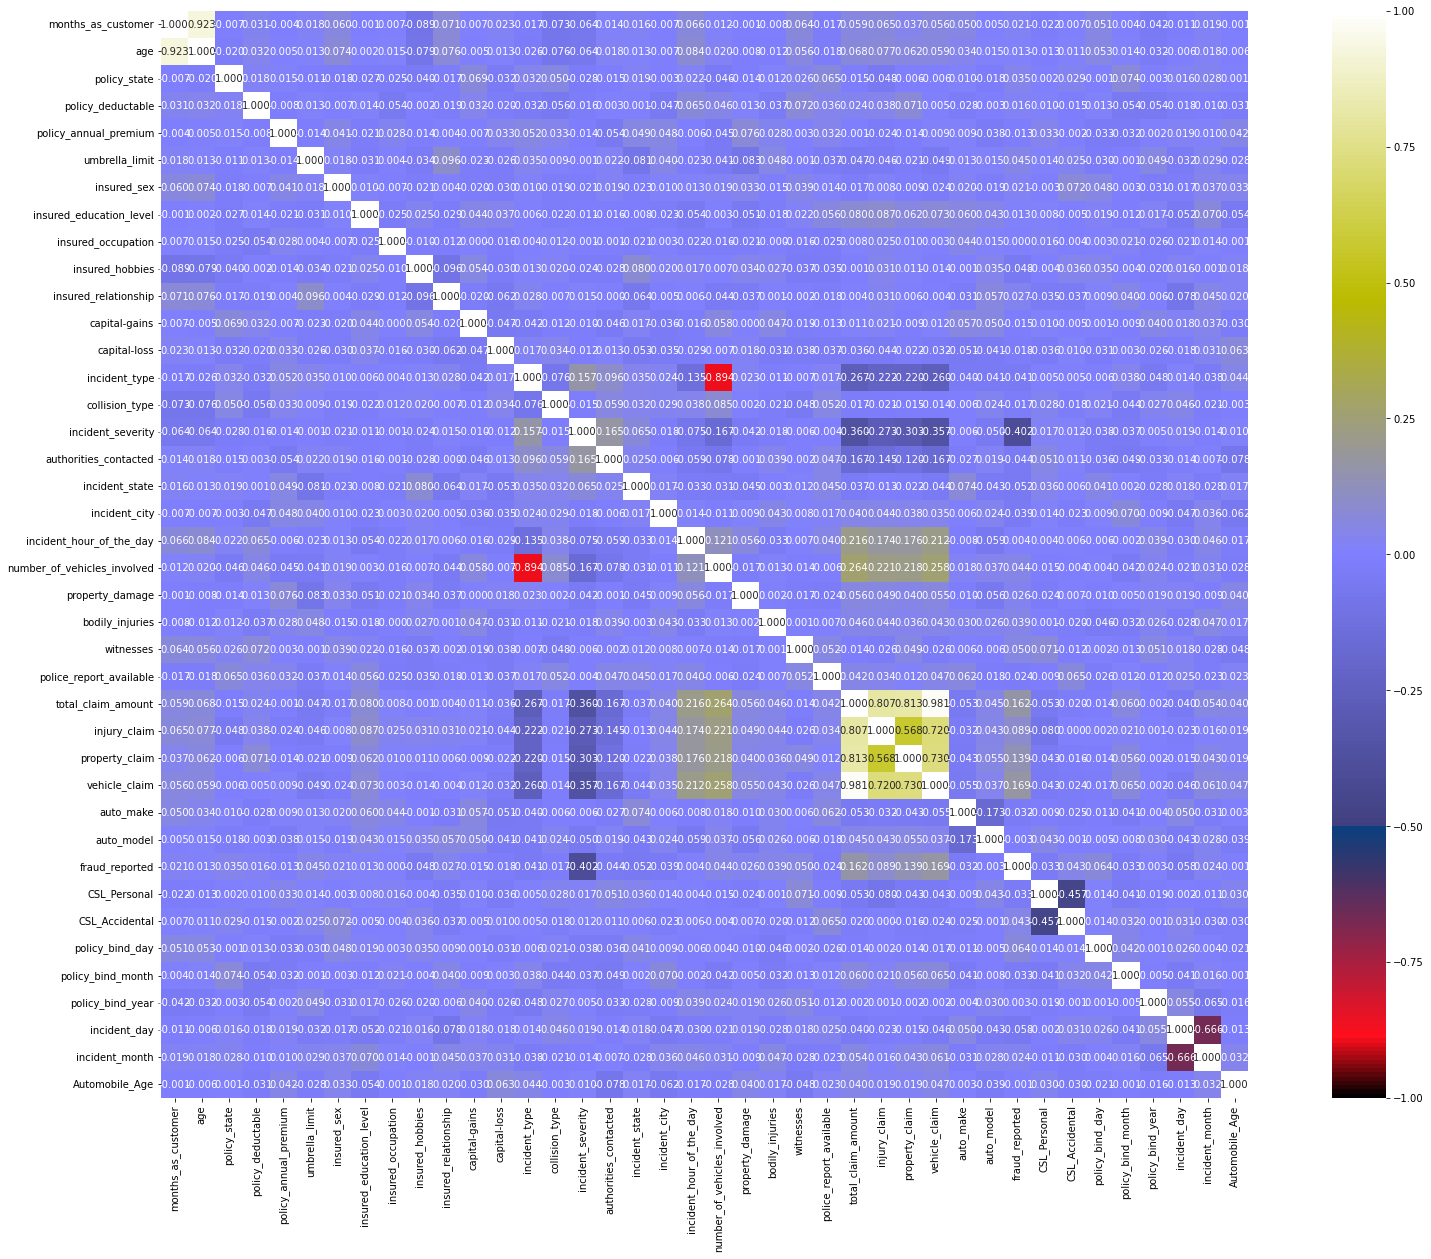

In [69]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

# Balancing Imbalanced target variable

In [70]:
df.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

from the above value counts report we can see that our target variable is highly imbalanced.
So we have to balance it by using SMOTE technique

# Split dataset into feature & target variables

In [71]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [72]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [73]:
Y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

# Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Let's check for Multicollinearity

Here we will use varinace inflation factor to check for multicollinearity

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.336388,months_as_customer
1,7.329608,age
2,1.065655,policy_state
3,1.057721,policy_deductable
4,1.051177,policy_annual_premium
5,1.064045,umbrella_limit
6,1.082845,insured_sex
7,1.058559,insured_education_level
8,1.029025,insured_occupation
9,1.063616,insured_hobbies


Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
Another way to address Multicollinerity is to Scaled Data and then apply PCA.

# PCA

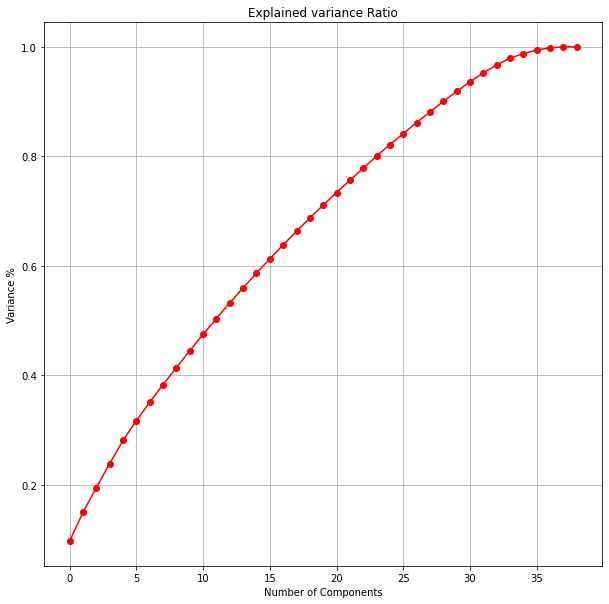

In [76]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

from the above graph we can observe that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction

In [77]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [78]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Model Building

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score

# Split data into training & testing set

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1036, 28)
Training target vector size: (1036,)
Test feature matrix size: (444, 28)
Test target vector size: (444,)


# Find Best random state

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8175675675675675 on Random_state 187


# Logistic Regression

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred_lr))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_lr))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred_lr))
print('\033[1m'+'cross validation score of Logistics Regression'+'\033[0m \n',cross_val_score(LogisticRegression(),principle_x, Y,cv=10).mean())

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8085585585585585


Confusion matrix of Logistics Regression : 
 [[179  48]
 [ 37 180]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       227
           1       0.79      0.83      0.81       217

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444

cross validation score of Logistics Regression 
 0.7655405405405405


# RandomForestClassifier

In [94]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print('\033[1m'+'Random Forest Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred_rf))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_rf))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred_rf))
print('\033[1m'+'cross validation score of Random Forest Classifier'+'\033[0m \n',cross_val_score(RandomForestClassifier(),principle_x, Y,cv=10).mean())

Random Forest Classifier Evaluation


Accuracy Score of Random Forest Classifier : 0.8265765765765766


Confusion matrix of Random Forest Classifier : 
 [[191  36]
 [ 41 176]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       227
           1       0.83      0.81      0.82       217

    accuracy                           0.83       444
   macro avg       0.83      0.83      0.83       444
weighted avg       0.83      0.83      0.83       444

cross validation score of Random Forest Classifier 
 0.8182432432432434


# Decision Tree Classifier

In [95]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred_dt))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_dt))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred_dt))
print('\033[1m'+'cross validation score of Decision Tree Classifier'+'\033[0m \n',cross_val_score(DecisionTreeClassifier(),principle_x, Y,cv=10).mean())

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.7117117117117117


Confusion matrix of DecisionTreeClassifier : 
 [[155  72]
 [ 56 161]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.73      0.68      0.71       227
           1       0.69      0.74      0.72       217

    accuracy                           0.71       444
   macro avg       0.71      0.71      0.71       444
weighted avg       0.71      0.71      0.71       444

cross validation score of Decision Tree Classifier 
 0.6966216216216217


# KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print('\033[1m'+'KNeighborsClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of KNeighborsClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred_knn))
print('\n')
print('\033[1m'+'Confusion matrix of KNeighborsClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_knn))
print('\n')
print('\033[1m'+'classification Report of KNeighborsClassifier'+'\033[0m \n',classification_report(Y_test, y_pred_knn))
print('\033[1m'+'cross validation score of KNeighborsClassifier'+'\033[0m \n',cross_val_score(KNeighborsClassifier(),principle_x, Y,cv=10).mean())

KNeighborsClassifier Evaluation


Accuracy Score of KNeighborsClassifier : 0.7274774774774775


Confusion matrix of KNeighborsClassifier : 
 [[115 112]
 [  9 208]]


classification Report of KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.93      0.51      0.66       227
           1       0.65      0.96      0.77       217

    accuracy                           0.73       444
   macro avg       0.79      0.73      0.71       444
weighted avg       0.79      0.73      0.71       444

cross validation score of KNeighborsClassifier 
 0.7182432432432433


# ExtraTreesClassifier

In [97]:
xt = ExtraTreesClassifier()
xt.fit(X_train,Y_train)
y_pred_xt=xt.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred_xt))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_xt))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred_xt))
print('\033[1m'+'cross validation score of ExtraTreesClassifier'+'\033[0m \n',cross_val_score(ExtraTreesClassifier(),principle_x, Y,cv=10).mean())

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.8400900900900901


Confusion matrix of ExtraTreesClassifier : 
 [[191  36]
 [ 35 182]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       227
           1       0.83      0.84      0.84       217

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84       444

cross validation score of ExtraTreesClassifier 
 0.8243243243243243


Since the RandomForestClassifier model gives best accuracy with minimum difference between accuraacy score & cross validation score
Hence we will select this one as final model and will do Hyperparameter tuning for the same

# Hyperparameter Optimization

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
n_estimators = [2,12,22,32,42]
criterion_list = ['gini','entropy']
max_features = ["auto",'log']
max_depth = [2,5]
min_samples_split = [3,4]
min_samples_leaf = [1,6]
bootstrap = ['true','false']

In [100]:
param_grid ={'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap}

In [101]:
clf = GridSearchCV(rf,param_grid = param_grid,cv = 10,verbose = True,n_jobs = -1)

In [102]:
best_clf = clf.fit(X,Y)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


In [103]:
best_clf.best_estimator_

RandomForestClassifier(bootstrap='true', max_depth=5, max_features='auto',
                       min_samples_split=3, n_estimators=32)

In [105]:
Final_mod = RandomForestClassifier(bootstrap='true',n_estimators= 32, max_depth=5 ,
                                 min_samples_split= 3, max_features= 'auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7657657657657657


# Confusion Matrix for Final Model

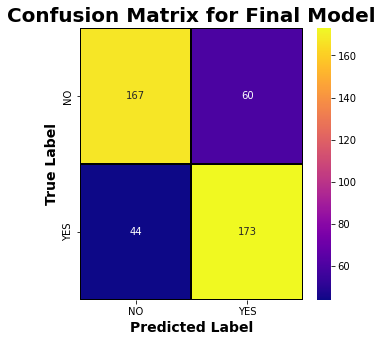

In [107]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

# AUC & ROC Curve

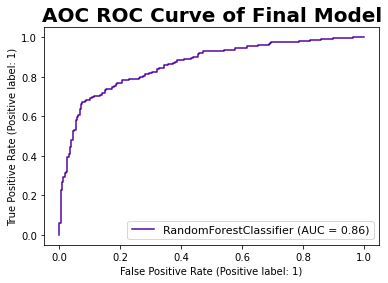

Auc Score :
 0.7664589212123671


In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [ ]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

In [ ]:
# Prediction
prediction = Final_mod.predict(X_test)

In [114]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(10)

,Predicted Values,Actual Values
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,0,1
7,1,1
8,0,0
9,0,0
